In [47]:
!pip install pandas matplotlib seaborn scikit-learn


In [48]:
#Goal  
#The goal of this project is to analyze how my screen time on Linkedin and TikTok fluctuates throughout my final year.   By tracking daily usage data, I will explore whether professional engagement on LinkedIn and entertainment-driven TikTok usage influence each other.  This project will enable me to understand how to better manage and spend my time, thus staying focused during the important job search period.

import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xml.etree.ElementTree as ET

In [49]:
import pandas as pd

file_path = "screentimeexcel.xlsx"

xls = pd.ExcelFile(file_path)

#Listing the sheet
print("Sheet name:", xls.sheet_names)


all_data = pd.concat([xls.parse(sheet_name) for sheet_name in xls.sheet_names])

print(all_data.head())

all_data

Sheet name: ['Sheet1']
        Date Day_Type  Linkedin_ScreenTime (minutes)  Jobs_Applied  \
0 2024-01-01  Weekday                              5             0   
1 2024-01-02  Weekday                              7             0   
2 2024-01-03  Weekday                             10             0   
3 2024-01-04  Weekday                             11             0   
4 2024-01-05  Weekday                              4             0   

  Academic_Events  Total_ScreenTime TikTok (minutes) Usage_Time TikTok  \
0            None                                 40         Afternoon   
1            None                                180             Night   
2            None                                 76           Evening   
3            None                                 30           Evening   
4            None                                 35           Evening   

  Usage_Time_LinkedIn  
0             Morning  
1             Morning  
2             Evening  
3             M

,Date,Day_Type,Linkedin_ScreenTime (minutes),Jobs_Applied,Academic_Events,Total_ScreenTime TikTok (minutes),Usage_Time TikTok,Usage_Time_LinkedIn
0,2024-01-01,Weekday,5,0,None,40,Afternoon,Morning
1,2024-01-02,Weekday,7,0,None,180,Night,Morning
2,2024-01-03,Weekday,10,0,None,76,Evening,Evening
3,2024-01-04,Weekday,11,0,None,30,Evening,Morning
4,2024-01-05,Weekday,4,0,None,35,Evening,Afternoon
5,2024-01-06,Weekend,3,0,Exam Period,30,Afternoon,Night
6,2024-01-07,Weekend,2,0,Exam Period,23,Night,Morning
7,2024-01-08,Weekday,8,0,Exam Period,44,Night,Afternoon
8,2024-01-09,Weekday,9,0,Exam Period,22,Night,Afternoon
9,2024-01-10,Weekday,4,0,Exam Period,26,Night,Afternoon


In [50]:
import pandas as pd


file_path = "screentimeexcel.xlsx"
xls = pd.ExcelFile(file_path)

print("Sheet names:", xls.sheet_names)


df = xls.parse(xls.sheet_names[0])  # veya sheet_name="screentime data"


daily_data = df.groupby('Date')[['Linkedin_ScreenTime (minutes)', 'Total_ScreenTime TikTok (minutes)']].sum().reset_index()


print(daily_data.head())

Sheet names: ['Sheet1']
        Date  Linkedin_ScreenTime (minutes)  Total_ScreenTime TikTok (minutes)
0 2024-01-01                              5                                 40
1 2024-01-02                              7                                180
2 2024-01-03                             10                                 76
3 2024-01-04                             11                                 30
4 2024-01-05                              4                                 35


In [51]:
import pandas as pd

file_path = "screentimeexcel.xlsx"
df = pd.read_excel(file_path)

# gives us the missing values
print("missing data:")
print(df.isnull().sum())

# deletes the missing values
df_clean = df.dropna()

# checks the cleaned data
print("\nCleaned data:")
print(df_clean.head())

missing data:
Date                                 0
Day_Type                             0
Linkedin_ScreenTime (minutes)        0
Jobs_Applied                         0
Academic_Events                      0
Total_ScreenTime TikTok (minutes)    0
Usage_Time TikTok                    0
Usage_Time_LinkedIn                  0
dtype: int64

Cleaned data:
        Date Day_Type  Linkedin_ScreenTime (minutes)  Jobs_Applied  \
0 2024-01-01  Weekday                              5             0   
1 2024-01-02  Weekday                              7             0   
2 2024-01-03  Weekday                             10             0   
3 2024-01-04  Weekday                             11             0   
4 2024-01-05  Weekday                              4             0   

  Academic_Events  Total_ScreenTime TikTok (minutes) Usage_Time TikTok  \
0            None                                 40         Afternoon   
1            None                                180             Night   
2  

In [52]:
# date to datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


print("\nDate Format Control:")
print(df_clean[['Date']].head())


Date Format Control:
        Date
0 2024-01-01
1 2024-01-02
2 2024-01-03
3 2024-01-04
4 2024-01-05


In [44]:
print("\nCleaned data set:")
print(df_clean.describe())

print("\nFirst 5 rows:")
print(df_clean.head())


Cleaned data set:
       Linkedin_ScreenTime (minutes)  Jobs_Applied  \
count                     366.000000    366.000000   
mean                       19.745902      0.150273   
std                        21.164157      0.540763   
min                         2.000000      0.000000   
25%                         5.000000      0.000000   
50%                        12.000000      0.000000   
75%                        26.750000      0.000000   
max                       156.000000      3.000000   

       Total_ScreenTime TikTok (minutes)  
count                         366.000000  
mean                           85.008197  
std                            55.988330  
min                             4.000000  
25%                            33.000000  
50%                            76.000000  
75%                           133.000000  
max                           206.000000  

First 5 rows:
        Date Day_Type  Linkedin_ScreenTime (minutes)  Jobs_Applied  \
0 2024-01-01  Weekday 

In [53]:
df_clean['Academic_Events'] = df_clean['Academic_Events'].fillna("No Event")

# Exam period days
exam_dates = df_clean[df_clean['Academic_Events'] == "Exam"]

# "No Event" days
no_event_dates = df_clean[df_clean['Academic_Events'] == "No Event"]

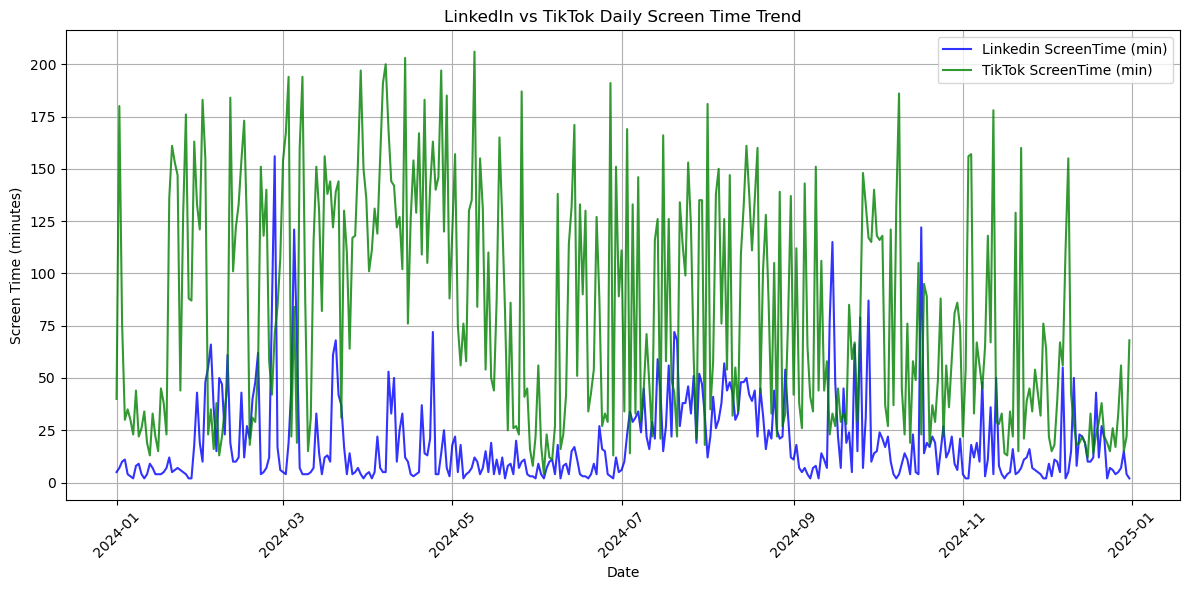

In [74]:
#explaratory data analysis just for linkedin and tiktok 

import pandas as pd
import matplotlib.pyplot as plt


file_path = "screentimeexcel.xlsx"
df = pd.read_excel(file_path)


df['Academic_Events'] = df['Academic_Events'].replace("None", "No Event").fillna("No Event")


df['Date'] = pd.to_datetime(df['Date'])


plt.figure(figsize=(12, 6))


plt.plot(df['Date'], df['Linkedin_ScreenTime (minutes)'], label='Linkedin ScreenTime (min)', color='blue', alpha=0.8)


plt.plot(df['Date'], df['Total_ScreenTime TikTok (minutes)'], label='TikTok ScreenTime (min)', color='green', alpha=0.8)


plt.xlabel('Date')
plt.ylabel('Screen Time (minutes)')
plt.title('LinkedIn vs TikTok Daily Screen Time Trend')
plt.xticks(rotation= 45)
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.show()

Job applications during Exam Period:
          Date  Jobs_Applied Academic_Events
94  2024-04-04             1     Exam Period
110 2024-04-20             1     Exam Period


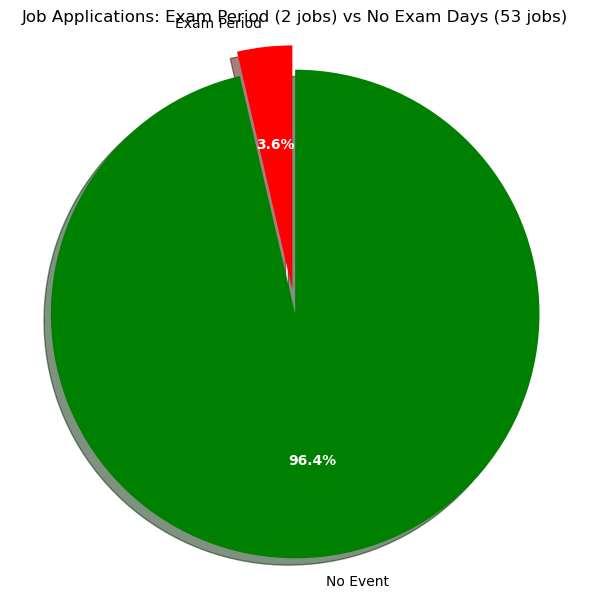

Total job applications during the Exam Period: 2
Total job applications on No Event days: 53


In [80]:
#The number of job applications submitted during the exam period and non-exam days (days with no significant academic events)
import pandas as pd
import matplotlib.pyplot as plt

file_path = "screentimeexcel.xlsx"
df = pd.read_excel(file_path)

# changing none (in excel) to No Event
df['Academic_Events'] = df['Academic_Events'].replace("None", "No Event").fillna("No Event")

# calculating job applications in exam period and none
exam_jobs = df[df['Academic_Events'] == 'Exam Period']['Jobs_Applied'].sum()
no_exam_jobs = df[df['Academic_Events'] == 'No Event']['Jobs_Applied'].sum()

# exam period applicaitons
exam_with_applications = df[(df['Academic_Events'] == 'Exam Period') & (df['Jobs_Applied'] > 0)]
print("Job applications during Exam Period:")
print(exam_with_applications[['Date', 'Jobs_Applied', 'Academic_Events']])

# Pie chart
labels = ['Exam Period', 'No Event']
sizes = [exam_jobs, no_exam_jobs]
colors = ['red', 'green']
explode = (0.1, 0)


fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    explode=explode,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    textprops={'fontsize': 10}
)

# percentage 
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# number of applications
plt.title(f'Job Applications: Exam Period ({exam_jobs} jobs) vs No Exam Days ({no_exam_jobs} jobs)', fontsize=12)
plt.axis('equal')  
plt.tight_layout()
plt.show()

# exam period applications
if exam_jobs > 0:
    print(f"Total job applications during the Exam Period: {exam_jobs}")
else:
    print("No job applications during the Exam Period.")

# no exam period applications
if no_exam_jobs > 0:
    print(f"Total job applications on No Event days: {no_exam_jobs}")
else:
    print("No job applications on No Event days.")

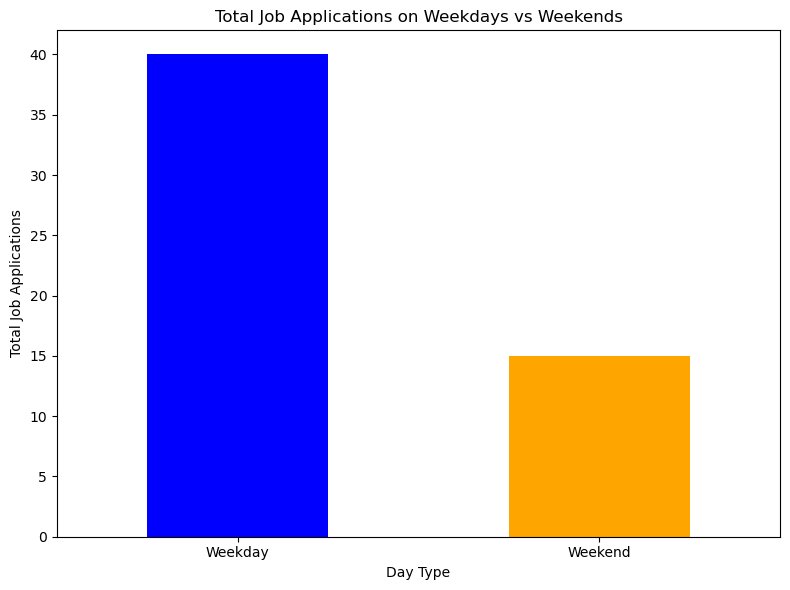

In [81]:
# Total number of job applications submitted on weekdays versus weekends
import pandas as pd
import matplotlib.pyplot as plt

file_path = "screentimeexcel.xlsx"
df = pd.read_excel(file_path)

df['Date'] = pd.to_datetime(df['Date'])

# separate weekend and weekday
df['Day_of_Week'] = df['Date'].dt.dayofweek

# weekday (first 5 day) weekend last 2 day seperation
df['Day_Type'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# total job applications on  weekend and weekday
job_applications_by_day_type = df.groupby('Day_Type')['Jobs_Applied'].sum()

# drawing
job_applications_by_day_type.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.title('Total Job Applications on Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Total Job Applications')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

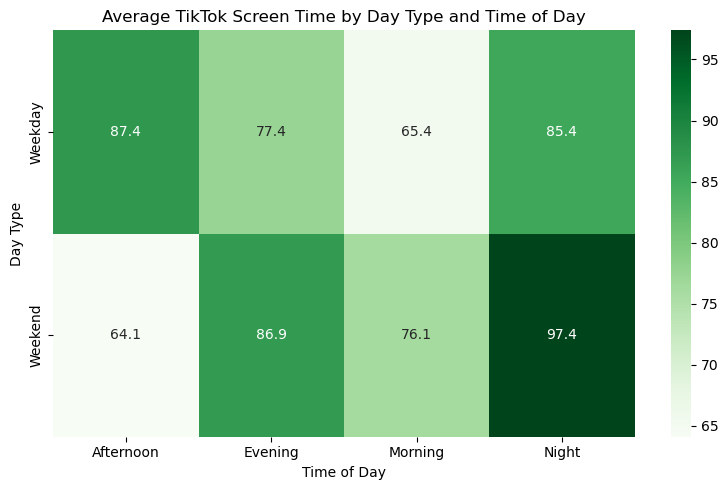

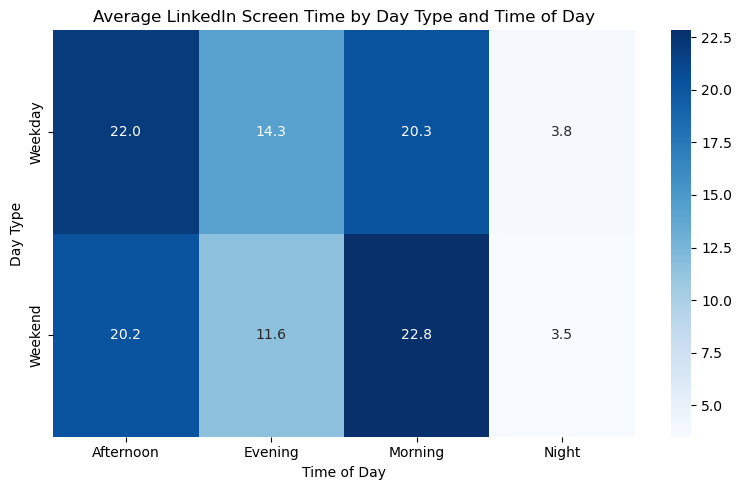

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi oku
file_path = "screentimeexcel.xlsx"
df = pd.read_excel(file_path)

# 'None' değerini 'No Event' olarak değiştir ve eksik verileri 'No Event' ile doldur
df['Academic_Events'] = df['Academic_Events'].replace("None", "No Event").fillna("No Event")

# LinkedIn ve TikTok ekran süresi sütunlarını doğru şekilde sayısal verilere dönüştür
df['Linkedin_ScreenTime (minutes)'] = pd.to_numeric(df['Linkedin_ScreenTime (minutes)'], errors='coerce')
df['Total_ScreenTime TikTok (minutes)'] = pd.to_numeric(df['Total_ScreenTime TikTok (minutes)'], errors='coerce')

# NaN değerlerini 0 ile doldur (Varsa)
df['Linkedin_ScreenTime (minutes)'] = df['Linkedin_ScreenTime (minutes)'].fillna(0)
df['Total_ScreenTime TikTok (minutes)'] = df['Total_ScreenTime TikTok (minutes)'].fillna(0)

# TikTok için ortalama ekran süresi pivot tablosu oluştur
tiktok_pivot = df.pivot_table(
    index='Day_Type',  # Gün tipi (Weekday, Weekend)
    columns='Usage_Time TikTok',  # Kullanım zamanı (Morning, Afternoon, Evening)
    values='Total_ScreenTime TikTok (minutes)',  # TikTok ekran süresi
    aggfunc='mean'  # Ortalama al
)

# LinkedIn için ortalama ekran süresi pivot tablosu oluştur
linkedin_pivot = df.pivot_table(
    index='Day_Type',  # Gün tipi (Weekday, Weekend)
    columns='Usage_Time_LinkedIn',  # Kullanım zamanı (Morning, Afternoon, Evening)
    values='Linkedin_ScreenTime (minutes)',  # LinkedIn ekran süresi
    aggfunc='mean'  # Ortalama al
)

# TikTok pivot tablosunu görselleştir
plt.figure(figsize=(8, 5))
sns.heatmap(tiktok_pivot, annot=True, cmap='Greens', fmt='.1f')
plt.title('Average TikTok Screen Time by Day Type and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Day Type')
plt.tight_layout()
plt.show()

# LinkedIn pivot tablosunu görselleştir
plt.figure(figsize=(8, 5))
sns.heatmap(linkedin_pivot, annot=True, cmap='Blues', fmt='.1f')
plt.title('Average LinkedIn Screen Time by Day Type and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Day Type')
plt.tight_layout()
plt.show()

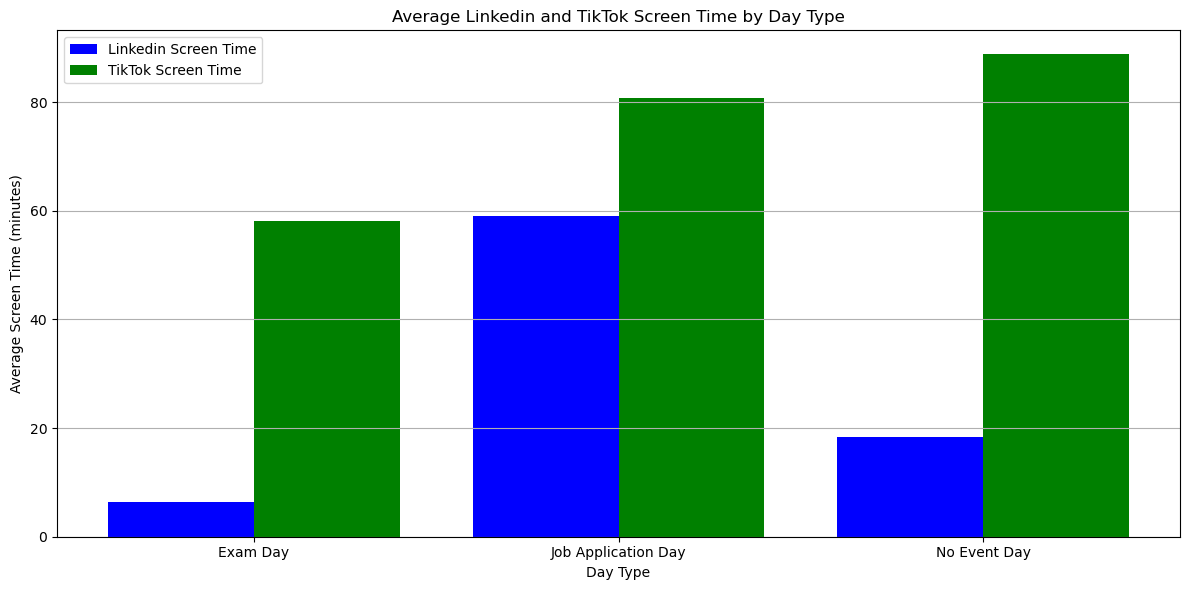

In [82]:
#average screen time on different types of days
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "screentimeexcel.xlsx"
df = pd.read_excel(file_path)

df = df.dropna(subset=['Linkedin_ScreenTime (minutes)', 'Total_ScreenTime TikTok (minutes)', 'Jobs_Applied', 'Academic_Events'])


df['Day_Type'] = df.apply(lambda row: 
                          'Job Application Day' if row['Jobs_Applied'] > 0 
                          else ('Exam Day' if row['Academic_Events'] == 'Exam Period' 
                                else 'No Event Day'), axis=1)

# avergae screen time based on day type
average_screen_time = df.groupby('Day_Type').agg({
    'Linkedin_ScreenTime (minutes)': 'mean',
    'Total_ScreenTime TikTok (minutes)': 'mean'
}).reset_index()


plt.figure(figsize=(12, 6))

bar_width = 0.40
x = range(len(average_screen_time))

# Linkedşn bars
plt.bar([i - bar_width/2 for i in x], 
        average_screen_time['Linkedin_ScreenTime (minutes)'], 
        width=bar_width, label='Linkedin Screen Time', color='blue')
# tt bars
plt.bar([i + bar_width/2 for i in x], 
        average_screen_time['Total_ScreenTime TikTok (minutes)'], 
        width=bar_width, label='TikTok Screen Time', color='green')

# X axis day type
plt.xticks(ticks=x, labels=average_screen_time['Day_Type'])


plt.xlabel('Day Type')
plt.ylabel('Average Screen Time (minutes)')
plt.title('Average Linkedin and TikTok Screen Time by Day Type')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

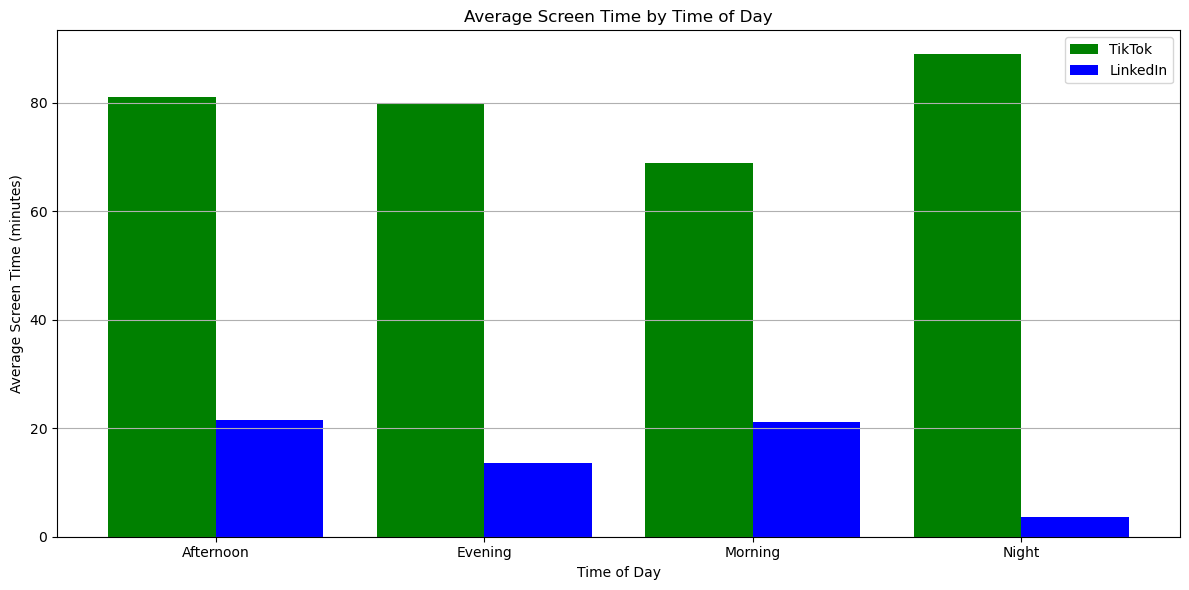

In [61]:
#average screen time across different times of the day for both platforms
import matplotlib.pyplot as plt


tiktok_by_hour = df.groupby('Usage_Time TikTok')['Total_ScreenTime TikTok (minutes)'].mean().reset_index()


linkedin_by_hour = df.groupby('Usage_Time_LinkedIn')['Linkedin_ScreenTime (minutes)'].mean().reset_index()


plt.figure(figsize=(12, 6))

bar_width = 0.4
x = range(len(tiktok_by_hour))


plt.bar([i - bar_width/2 for i in x], tiktok_by_hour['Total_ScreenTime TikTok (minutes)'], 
        width=bar_width, label='TikTok', color='green')

plt.bar([i + bar_width/2 for i in x], linkedin_by_hour['Linkedin_ScreenTime (minutes)'], 
        width=bar_width, label='LinkedIn', color='blue')


plt.xticks(ticks=x, labels=tiktok_by_hour['Usage_Time TikTok'])


plt.xlabel('Time of Day')
plt.ylabel('Average Screen Time (minutes)')
plt.title('Average Screen Time by Time of Day')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Index(['Date', 'Day_Type', 'Linkedin_ScreenTime (minutes)', 'Jobs_Applied',
       'Academic_Events', 'Total_ScreenTime TikTok (minutes)',
       'Usage_Time TikTok', 'Usage_Time_LinkedIn'],
      dtype='object')


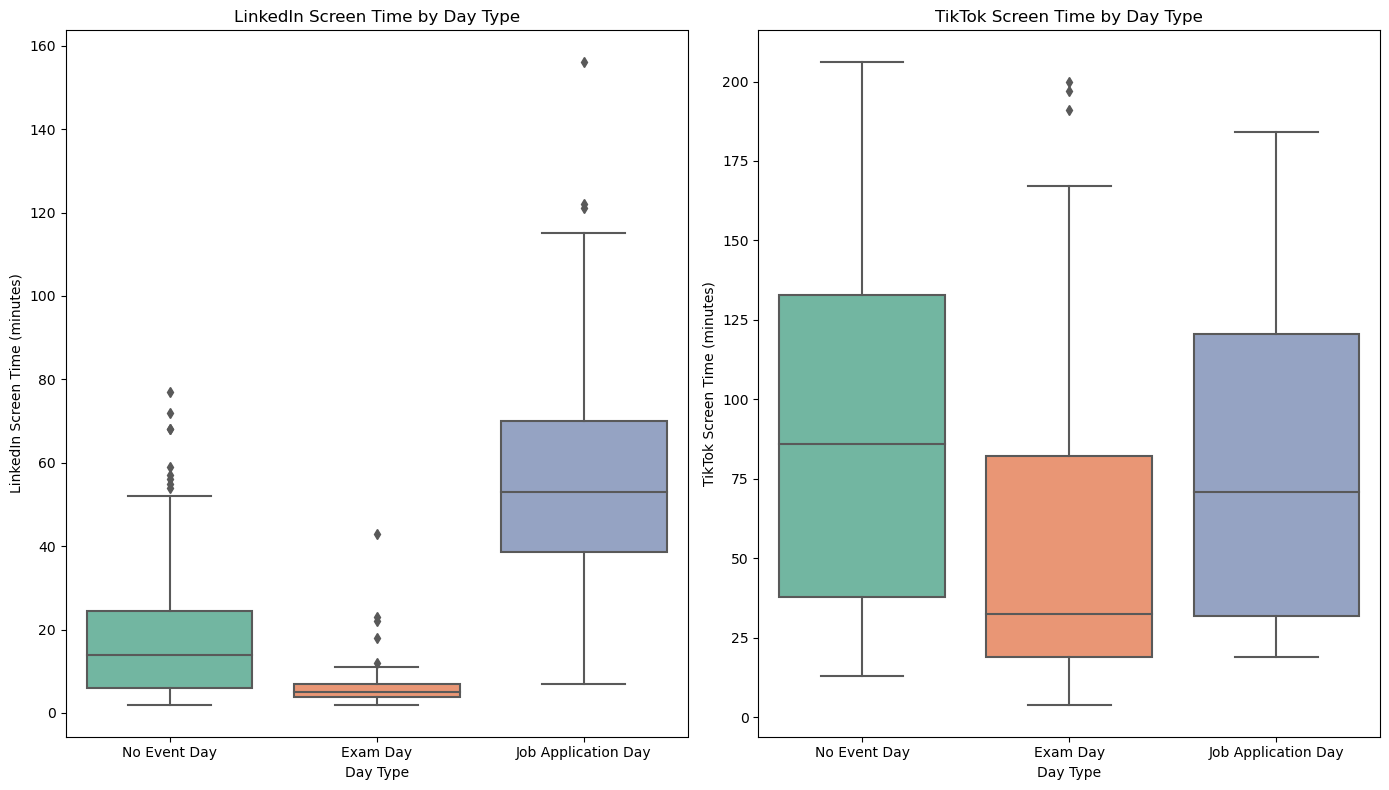

In [79]:
#Distribution of Linkedin and TikTok screen time across different day types like exam days, job application days, and regular days

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


print(df.columns)


df['Day_Type'] = df.apply(lambda row: 
                          'Job Application Day' if row['Jobs_Applied'] > 0  # 'Job_Applications' yerine 'Jobs_Applied' kullanıyoruz
                          else ('Exam Day' if row['Academic_Events'] == 'Exam Period' 
                                else 'No Event Day'), axis=1)


plt.figure(figsize=(14, 8))


plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Day_Type', y='Linkedin_ScreenTime (minutes)', palette='Set2')
plt.title('LinkedIn Screen Time by Day Type')
plt.xlabel('Day Type')
plt.ylabel('LinkedIn Screen Time (minutes)')

# Box Plot: TikTok Screen Time by Day Type
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Day_Type', y='Total_ScreenTime TikTok (minutes)', palette='Set2')
plt.title('TikTok Screen Time by Day Type')
plt.xlabel('Day Type')
plt.ylabel('TikTok Screen Time (minutes)')

plt.tight_layout()
plt.show()

Weekly Averages:
                       Linkedin_ScreenTime (minutes)  \
week                                                   
2024-01-01/2024-01-07                       6.000000   
2024-01-08/2024-01-14                       6.142857   
2024-01-15/2024-01-21                       5.857143   
2024-01-22/2024-01-28                       4.571429   
2024-01-29/2024-02-04                      37.000000   

                       Total_ScreenTime TikTok (minutes)  
week                                                      
2024-01-01/2024-01-07                          59.142857  
2024-01-08/2024-01-14                          27.285714  
2024-01-15/2024-01-21                          62.857143  
2024-01-22/2024-01-28                         117.571429  
2024-01-29/2024-02-04                         116.142857  


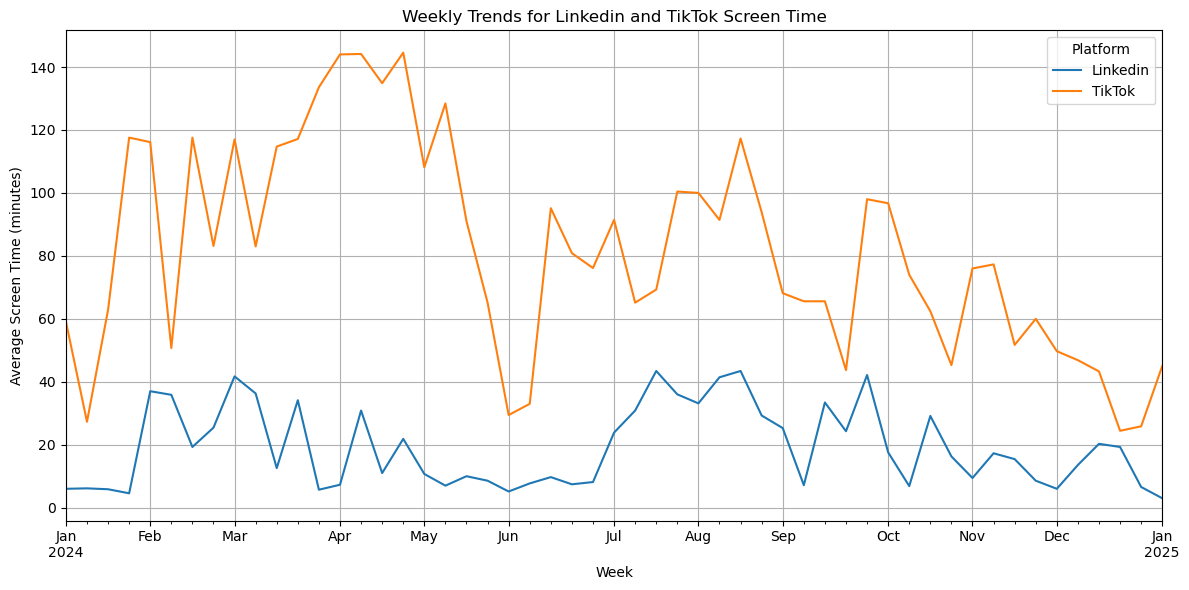

In [64]:
#line chart
#x axis: screen time 
#y axis: date
#lines: linkedin ve tt 
#line chart to visualize how screen time on Linkedin and TikTok changes over time.
import pandas as pd
import matplotlib.pyplot as plt

file_path = "screentimeexcel.xlsx"
df = pd.read_excel(file_path)

df['Date'] = pd.to_datetime(df['Date'])

df['week'] = df['Date'].dt.to_period('W')

weekly_averages = df.groupby('week')[['Linkedin_ScreenTime (minutes)', 'Total_ScreenTime TikTok (minutes)']].mean()

# average screen time for each platform
print("Weekly Averages:")
print(weekly_averages.head())

#tren
weekly_averages.plot(kind='line', figsize=(12, 6))
plt.title('Weekly Trends for Linkedin and TikTok Screen Time')
plt.ylabel('Average Screen Time (minutes)')
plt.xlabel('Week')
plt.grid(True)
plt.legend(title="Platform", labels=['Linkedin', 'TikTok'])
plt.tight_layout()
plt.show()

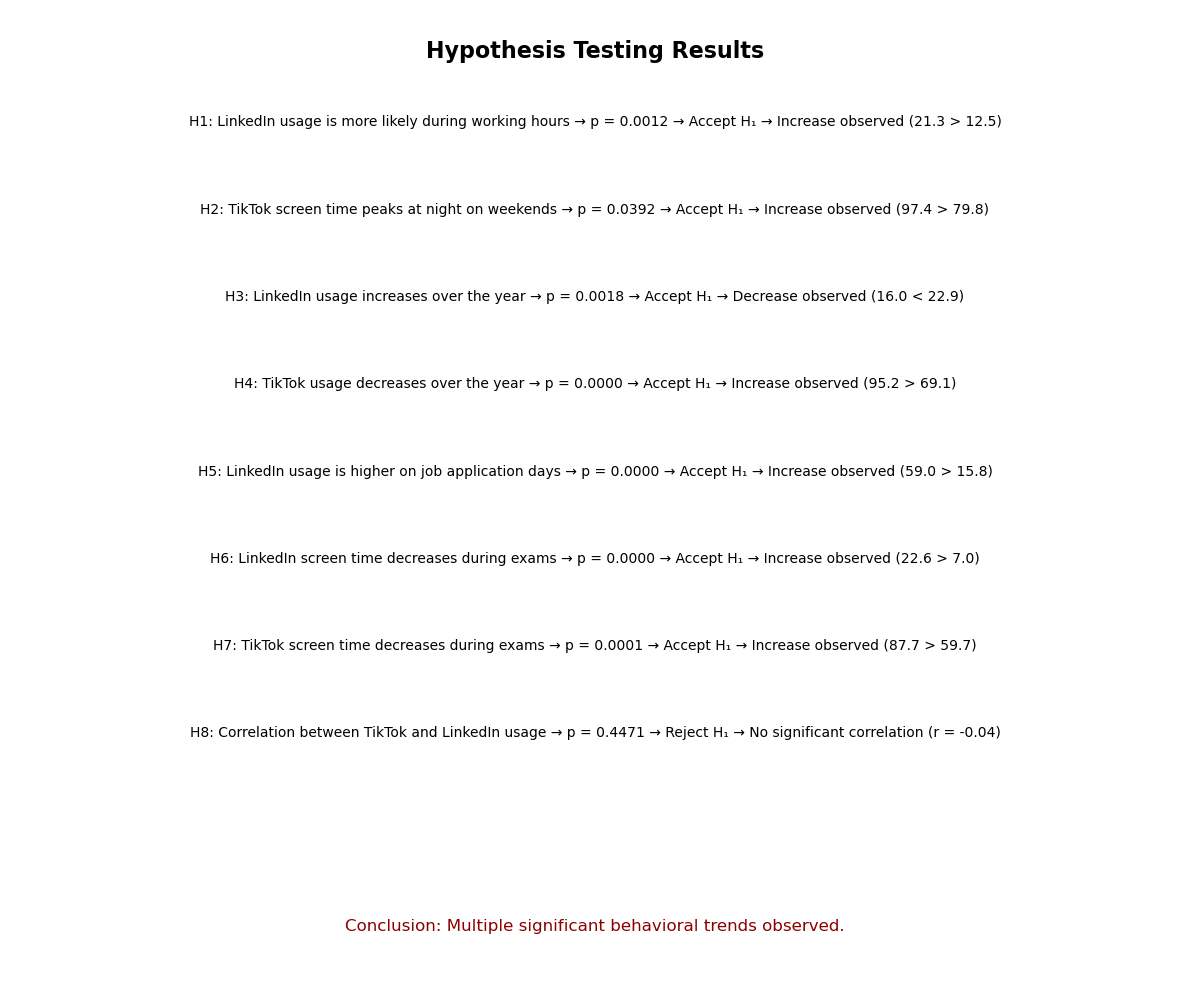

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

# Veriyi oku
file_path = "screentimeexcel.xlsx"
df = pd.read_excel(file_path)

# Temizlik ve dönüşüm
df['Academic_Events'] = df['Academic_Events'].replace("None", "No Event").fillna("No Event")
df['Linkedin_ScreenTime (minutes)'] = pd.to_numeric(df['Linkedin_ScreenTime (minutes)'], errors='coerce').fillna(0)
df['Total_ScreenTime TikTok (minutes)'] = pd.to_numeric(df['Total_ScreenTime TikTok (minutes)'], errors='coerce').fillna(0)
df['Usage_Time TikTok'] = df['Usage_Time TikTok'].str.strip()
df['Usage_Time_LinkedIn'] = df['Usage_Time_LinkedIn'].str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Day_Type'] = df['Day_of_Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# H1: LinkedIn usage is more likely during working hours (morning/afternoon)
li_work = df[df['Usage_Time_LinkedIn'].isin(['Morning', 'Afternoon'])]['Linkedin_ScreenTime (minutes)']
li_non_work = df[~df['Usage_Time_LinkedIn'].isin(['Morning', 'Afternoon'])]['Linkedin_ScreenTime (minutes)']

# H2: TikTok screen time peaks at night, especially on weekends
tt_night_weekend = df[(df['Usage_Time TikTok'] == 'Night') & (df['Day_Type'] == 'Weekend')]['Total_ScreenTime TikTok (minutes)']
tt_other = df[~((df['Usage_Time TikTok'] == 'Night') & (df['Day_Type'] == 'Weekend'))]['Total_ScreenTime TikTok (minutes)']

# H3: LinkedIn usage increases over the year
li_early = df[df['Date'].dt.month < 7]['Linkedin_ScreenTime (minutes)']
li_late = df[df['Date'].dt.month >= 7]['Linkedin_ScreenTime (minutes)']

# H4: TikTok usage decreases over the year
tt_early = df[df['Date'].dt.month < 7]['Total_ScreenTime TikTok (minutes)']
tt_late = df[df['Date'].dt.month >= 7]['Total_ScreenTime TikTok (minutes)']

# H5: LinkedIn usage is higher on job application days
li_job = df[df['Jobs_Applied'] > 0]['Linkedin_ScreenTime (minutes)']
li_no_job = df[df['Jobs_Applied'] == 0]['Linkedin_ScreenTime (minutes)']

# H6: LinkedIn screen time decreases during exam periods
li_exam = df[df['Academic_Events'].str.lower().str.contains('exam')]['Linkedin_ScreenTime (minutes)']
li_no_exam = df[~df['Academic_Events'].str.lower().str.contains('exam')]['Linkedin_ScreenTime (minutes)']

# H7: TikTok screen time decreases during exam periods
tt_exam = df[df['Academic_Events'].str.lower().str.contains('exam')]['Total_ScreenTime TikTok (minutes)']
tt_no_exam = df[~df['Academic_Events'].str.lower().str.contains('exam')]['Total_ScreenTime TikTok (minutes)']

# H8: Correlation between TikTok and LinkedIn usage
tt_all = df["Total_ScreenTime TikTok (minutes)"].dropna()
li_all = df["Linkedin_ScreenTime (minutes)"].dropna()
corr_coef, p_corr = pearsonr(tt_all, li_all)

# Hipotezler listesi
results = [
    ("H1: LinkedIn usage is more likely during working hours", li_work, li_non_work, None),
    ("H2: TikTok screen time peaks at night on weekends", tt_night_weekend, tt_other, None),
    ("H3: LinkedIn usage increases over the year", li_early, li_late, None),
    ("H4: TikTok usage decreases over the year", tt_early, tt_late, None),
    ("H5: LinkedIn usage is higher on job application days", li_job, li_no_job, None),
    ("H6: LinkedIn screen time decreases during exams", li_no_exam, li_exam, None),
    ("H7: TikTok screen time decreases during exams", tt_no_exam, tt_exam, None),
    ("H8: Correlation between TikTok and LinkedIn usage", tt_all, li_all, p_corr),
]

# T-Test uygulaması
for i in range(len(results)):
    if results[i][3] is None:
        _, p_val = ttest_ind(results[i][1], results[i][2], nan_policy='omit')
        results[i] = (results[i][0], results[i][1], results[i][2], p_val)

# Yorum fonksiyonu
def interpret(p, g1, g2, is_corr=False):
    if is_corr:
        corr = g1.corr(g2)
        if p < 0.05 and corr < 0:
            return f"Accept H₁ → Significant inverse correlation (r = {corr:.2f})"
        elif p < 0.05:
            return f"Accept H₁ → Significant correlation (r = {corr:.2f})"
        else:
            return f"Reject H₁ → No significant correlation (r = {corr:.2f})"
    else:
        m1, m2 = g1.mean(), g2.mean()
        if p < 0.05:
            if m1 > m2:
                return f"Accept H₁ → Increase observed ({m1:.1f} > {m2:.1f})"
            else:
                return f"Accept H₁ → Decrease observed ({m1:.1f} < {m2:.1f})"
        else:
            return f"Reject H₁ → No significant difference ({m1:.1f} ≈ {m2:.1f})"

# Görselleştirme
plt.figure(figsize=(12, 10))
plt.text(0.5, 0.95, "Hypothesis Testing Results", ha='center', fontsize=16, weight='bold')

y = 0.88
for label, g1, g2, p in results:
    is_corr = "Correlation" in label
    comment = interpret(p, g1, g2, is_corr)
    plt.text(0.5, y, f"{label} → p = {p:.4f} → {comment}", ha='center', fontsize=10)
    y -= 0.09

# Sonuç özeti
sig_count = sum(p < 0.05 for _, _, _, p in results)
summary = "Conclusion: Multiple significant behavioral trends observed." if sig_count >= 4 else "Conclusion: Few significant patterns found."
plt.text(0.5, 0.05, summary, ha='center', fontsize=12, color='darkred')

plt.axis('off')
plt.tight_layout()
plt.show()

In [84]:
#pearson correlation
import pandas as pd
from scipy.stats import pearsonr


file_path = "screentimeexcel.xlsx"
df = pd.read_excel(file_path)


df['Academic_Events'] = df['Academic_Events'].replace("None", "No Event").fillna("No Event")
df['Date'] = pd.to_datetime(df['Date'])


df['Linkedin_ScreenTime (minutes)'] = pd.to_numeric(df['Linkedin_ScreenTime (minutes)'], errors='coerce')
df['Total_ScreenTime TikTok (minutes)'] = pd.to_numeric(df['Total_ScreenTime TikTok (minutes)'], errors='coerce')
df['Jobs_Applied'] = pd.to_numeric(df['Jobs_Applied'], errors='coerce').fillna(0)
df['Day_of_Year'] = df['Date'].dt.dayofyear

# 1. Linkedin vs TikTok
r1, p1 = pearsonr(df['Linkedin_ScreenTime (minutes)'], df['Total_ScreenTime TikTok (minutes)'])

# 2. TikTok vs Exam Days (binary: Exam=1, No Event=0)
df['Exam_Day'] = df['Academic_Events'].apply(lambda x: 1 if 'exam' in x.lower() else 0)
r2, p2 = pearsonr(df['Exam_Day'], df['Total_ScreenTime TikTok (minutes)'])

# 3. Linkedin vs Exam Days
r3, p3 = pearsonr(df['Exam_Day'], df['Linkedin_ScreenTime (minutes)'])

# 4. Linkedin vs Job Applications
r4, p4 = pearsonr(df['Jobs_Applied'], df['Linkedin_ScreenTime (minutes)'])

# 5. Linkedin vs Time (Graduation Trend)
r5, p5 = pearsonr(df['Day_of_Year'], df['Linkedin_ScreenTime (minutes)'])

# 6. TikTok vs Time (Graduation Trend)
r6, p6 = pearsonr(df['Day_of_Year'], df['Total_ScreenTime TikTok (minutes)'])

# Sonuçları yazdır
print("1. LinkedIn vs TikTok:", f"r = {r1:.2f}, p = {p1:.4f}")
print("2. TikTok vs Exam Days:", f"r = {r2:.2f}, p = {p2:.4f}")
print("3. LinkedIn vs Exam Days:", f"r = {r3:.2f}, p = {p3:.4f}")
print("4. LinkedIn vs Job Applications:", f"r = {r4:.2f}, p = {p4:.4f}")
print("5. LinkedIn vs Time (Graduation):", f"r = {r5:.2f}, p = {p5:.4f}")
print("6. TikTok vs Time (Graduation):", f"r = {r6:.2f}, p = {p6:.4f}")

#r positive: positive correlation
#r negative: negative correlation
#p < 0.05 accept h1

1. LinkedIn vs TikTok: r = -0.04, p = 0.4471
2. TikTok vs Exam Days: r = -0.21, p = 0.0001
3. LinkedIn vs Exam Days: r = -0.30, p = 0.0000
4. LinkedIn vs Job Applications: r = 0.66, p = 0.0000
5. LinkedIn vs Time (Graduation): r = -0.01, p = 0.9211
6. TikTok vs Time (Graduation): r = -0.28, p = 0.0000


In [ ]:

#I’ve noticed that my TikTok usage has decreased over time, which shows that I become more focused during my final year.

# I’ve also been using Linkedin more actively on the days I apply for jobs, which indicates that I’ve been engaging with it linkedin as part of my career development.

# But my overall Linkedin usage didn’t show a significant increase (just a little bit )as graduation approached, which was something I initially expected.

# Additionally, there wasn’t a strong interaction between the two platforms — using one more didn’t necessarily mean I used the other less.